In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [30]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1= nn.Conv2d(1, 16, 3, 1)
        self.cn2= nn.Conv2d(16, 32, 3, 1)
        self.dp1= nn.Dropout2d(0.10)
        self.dp2= nn.Dropout2d(0.25)
        self.fc1= nn.Linear(4608, 64) #4608= 12*12*32
        self.fc2= nn.Linear(64, 10)
        
    def forward(self, x):
        x= self.cn1(x)
        x= F.relu(x)
        x= self.cn2(x)
        x= F.relu(x)
        x= F.max_pool2d(x,2)
        x= self.dp1(x)
        x= torch.flatten(x, 1)
        x= self.fc1(x)
        x= F.relu(x)
        x= self.dp2(x)
        x= self.fc2(x)
        op= F.log_softmax(x, dim=1)
        
        return op
    

In [31]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X,y) in enumerate(train_dataloader):
        X,y= X.to(device), y.to(device)
        optim.zero_grad()
        pred_prob= model(X)
        loss= F.nll_loss(pred_prob, y) #nll-> negative likelihood loss
        loss.backward()
        optim.step()
        if b_i%10==0:
            print('Epoch: {} [{}/{} ({:.0f}%)]\t training loss: {:.6f}'
                    .format(
                        epoch,
                        b_i*len(X),
                        len(train_dataloader.dataset),
                        100.*b_i/len(train_dataloader),
                        loss.item()
                           ))

In [43]:
def test(model, device, test_dataloader):
    model.eval()
    loss=0
    success=0
    with torch.no_grad():
        for X,y in test_dataloader:
            X,y= X.to(device), y.to(device)
            pred_prob= model(X)
            loss+= F.nll_loss(pred_prob, y, reduction='sum').item()
            #loss summed across the batch
            pred= pred_prob.argmax(dim=1, keepdim=True)
            #use argmax to get the most likely prediction
            success+= pred.eq(y.view_as(pred)).sum().item()
    loss/= len(test_dataloader.dataset)
    print('\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n'.format(
            loss, 
            success, 
            len(test_dataloader.dataset),
            100.*success/len(test_dataloader.dataset)
        ))

In [44]:
train_dataloader= torch.utils.data.DataLoader(
                datasets.MNIST('../data', 
                            train=True, 
                            download=True,
                            transform= transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1302,),(0.3069,))])),
                            #train_X.mean()/256 and train_x.std()/256
                            
                            batch_size= 32,
                            shuffle= True
                        
            )

In [45]:
test_dataloader= torch.utils.data.DataLoader(
                    datasets.MNIST(
                        '../data', train=False,
                        transform= transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1302,),(0.3069,))
                            ])
                        ),
                    batch_size=500,
                    shuffle= False
                )

In [46]:
torch.manual_seed(0)
device= torch.device("cpu")
model= ConvNet()
optimizer= optim.Adadelta(model.parameters(), lr=0.5)

In [47]:
for epoch in range(1, 3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

Epoch: 1 [0/60000 (0%)]	 training loss: 2.301478
Epoch: 1 [320/60000 (1%)]	 training loss: 1.744135
Epoch: 1 [640/60000 (1%)]	 training loss: 1.240407
Epoch: 1 [960/60000 (2%)]	 training loss: 0.842911
Epoch: 1 [1280/60000 (2%)]	 training loss: 0.949035
Epoch: 1 [1600/60000 (3%)]	 training loss: 0.558535
Epoch: 1 [1920/60000 (3%)]	 training loss: 0.620267
Epoch: 1 [2240/60000 (4%)]	 training loss: 0.507514
Epoch: 1 [2560/60000 (4%)]	 training loss: 0.467612
Epoch: 1 [2880/60000 (5%)]	 training loss: 0.333438
Epoch: 1 [3200/60000 (5%)]	 training loss: 0.370361
Epoch: 1 [3520/60000 (6%)]	 training loss: 0.361129
Epoch: 1 [3840/60000 (6%)]	 training loss: 0.330249
Epoch: 1 [4160/60000 (7%)]	 training loss: 0.451925
Epoch: 1 [4480/60000 (7%)]	 training loss: 0.376810
Epoch: 1 [4800/60000 (8%)]	 training loss: 0.462895
Epoch: 1 [5120/60000 (9%)]	 training loss: 0.204568
Epoch: 1 [5440/60000 (9%)]	 training loss: 0.309104
Epoch: 1 [5760/60000 (10%)]	 training loss: 0.118858
Epoch: 1 [6080/60

Epoch: 1 [49280/60000 (82%)]	 training loss: 0.229838
Epoch: 1 [49600/60000 (83%)]	 training loss: 0.067799
Epoch: 1 [49920/60000 (83%)]	 training loss: 0.010049
Epoch: 1 [50240/60000 (84%)]	 training loss: 0.121754
Epoch: 1 [50560/60000 (84%)]	 training loss: 0.005505
Epoch: 1 [50880/60000 (85%)]	 training loss: 0.007708
Epoch: 1 [51200/60000 (85%)]	 training loss: 0.251524
Epoch: 1 [51520/60000 (86%)]	 training loss: 0.007059
Epoch: 1 [51840/60000 (86%)]	 training loss: 0.020428
Epoch: 1 [52160/60000 (87%)]	 training loss: 0.010024
Epoch: 1 [52480/60000 (87%)]	 training loss: 0.027585
Epoch: 1 [52800/60000 (88%)]	 training loss: 0.058778
Epoch: 1 [53120/60000 (89%)]	 training loss: 0.043344
Epoch: 1 [53440/60000 (89%)]	 training loss: 0.086786
Epoch: 1 [53760/60000 (90%)]	 training loss: 0.084133
Epoch: 1 [54080/60000 (90%)]	 training loss: 0.039657
Epoch: 1 [54400/60000 (91%)]	 training loss: 0.104869
Epoch: 1 [54720/60000 (91%)]	 training loss: 0.035542
Epoch: 1 [55040/60000 (92%)]

Epoch: 2 [37760/60000 (63%)]	 training loss: 0.153400
Epoch: 2 [38080/60000 (63%)]	 training loss: 0.062601
Epoch: 2 [38400/60000 (64%)]	 training loss: 0.119492
Epoch: 2 [38720/60000 (65%)]	 training loss: 0.016463
Epoch: 2 [39040/60000 (65%)]	 training loss: 0.008085
Epoch: 2 [39360/60000 (66%)]	 training loss: 0.027865
Epoch: 2 [39680/60000 (66%)]	 training loss: 0.001634
Epoch: 2 [40000/60000 (67%)]	 training loss: 0.160155
Epoch: 2 [40320/60000 (67%)]	 training loss: 0.040541
Epoch: 2 [40640/60000 (68%)]	 training loss: 0.031036
Epoch: 2 [40960/60000 (68%)]	 training loss: 0.002685
Epoch: 2 [41280/60000 (69%)]	 training loss: 0.022982
Epoch: 2 [41600/60000 (69%)]	 training loss: 0.021805
Epoch: 2 [41920/60000 (70%)]	 training loss: 0.002257
Epoch: 2 [42240/60000 (70%)]	 training loss: 0.000630
Epoch: 2 [42560/60000 (71%)]	 training loss: 0.014772
Epoch: 2 [42880/60000 (71%)]	 training loss: 0.029629
Epoch: 2 [43200/60000 (72%)]	 training loss: 0.028959
Epoch: 2 [43520/60000 (73%)]

### Run inference on trained model

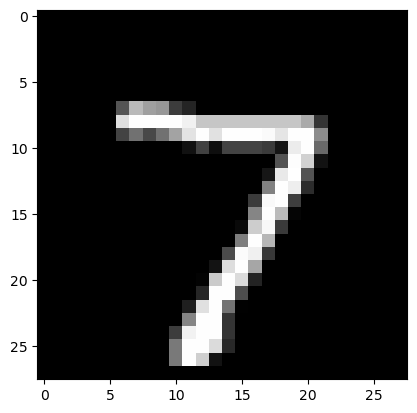

In [48]:
test_samples= enumerate(test_dataloader)
b_i, (sample_data, sample_targets)= next(test_samples)

plt.imshow(sample_data[0][0], cmap='gray', interpolation='none')
plt.show()

In [50]:
print(f"Model prediction is: {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is: {sample_targets[0]}")

Model prediction is: 7
Ground truth is: 7
